## Analysis of the evolution of poverty and income distribution in the United States
(Usage of Vincent Maps for Geographical Topography geo-data)

### Data source: 

https://www.census.gov/did/www/saipe/data/statecounty/data/index.html

The data fields are described here:https://www.census.gov/did/www/saipe/data/statecounty/data/2000.html 
Extract the required fields. The required fields are: 
   'State FIPS', 'County FIPS','Poverty Estimate All Ages', 'Poverty Percent All Ages', 
   'Poverty Estimate Under Age 18', 'Poverty Percent Under Age 18', 'Poverty Estimate Ages 5-17', 
   'Poverty Percent Ages 5-17', 'Median Household Income','Name','Postal'
 
### Pandas Data-Frames

1) Data Loading
    - creating a data frame with just the country-wide data
    - creating a data frame with just the data of the states
    - creating a data frame with just the data of the counties
    
2) Plot a graph of 'Poverty Percent All Ages' of the entire country vs year (line graph).
   Plot a graph of 'Median Household Income' of the entire country vs year (line graph)

3) Plot the total poverty in each state across the years and compare it with the country-wide poverty

4) Plot county-wide poverty stats

- Creating a dataframe with the Unique FIPS code (obtained by combining the state and county FIPS), 'Poverty Percent All Ages' in every county in 2000, 'Poverty Percent All Ages' in every county in 2013 and the change ratio between 2000 and 2013. (change ratio = poverty % in 2013 / poverty % in 2000. Divide this by the nationwide change ratio for normalization. A value > 1 indicates that poverty is higher compared to the nation-wide poverty and a value < 1 indicates that poverty is lower compared to the nationwide poverty.)


FIPS code is a unique code to identify counties and states in the US. In this data you have been given state code and county code separately. You will have to combine the state code and the county code to generate a unique code for each place, which will be used to plot on the map. Ensuring the state code is 2 digits and county code is 3 digits by adding zeroes to the front (if required).
- Plot the 'Poverty Percent All Ages' for each county on the map for the years 2000 and 2013.
- Plot the normalized change ratio on the map.
- Find the counties which witnessed the most positive and most negative change in poverty,

For visualization, we will use a library called Vincent, which lets plot data for places using their FIPS code instead of using latitude/longitude. 

For plotting the counties on the map, you will need to use the file us_counties.topo.json present in this folder.

In [1]:
import urllib2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_year(url):
    yy = int(url[-9:-7])
    if yy < 25:
        yy = yy + 2000
    else: 
        yy = yy + 1900
    return yy  

In [3]:
urls = ['https://www.census.gov/did/www/saipe/downloads/estmod93/est93ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod95/est95ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod97/est97ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod98/est98ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod99/est99ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod00/est00ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod01/est01ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod02/est02ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod03/est03ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod04/est04ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod05/est05ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod06/est06ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod07/est07ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod08/est08ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod09/est09ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod10/est10ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod11/est11all.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod12/est12ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod13/est13ALL.txt']

def getUrl(urls):
    col_position = [(1,2),(4,6),(8,15),(35,38),(50,57),(77,80),(92,99),(119,122),(134,139),(194,238),(240,241)]
    col_names = ['State FIPS', 'County FIPS','Poverty Estimate All Ages', 
                   'Poverty Percent All Ages', 'Poverty Estimate Under Age 18', 
                   'Poverty Percent Under Age 18', 'Poverty Estimate Ages 5-17', 
                   'Poverty Percent Ages 5-17', 'Median Household Income','Name',
                   'Postal']

    ori_df = pd.DataFrame()

    for url in urls:
        tmp_df = pd.read_fwf(url, colspecs=[(x-1, y) for x,y in col_position] , names= col_names, na_values='.')
    
        tmp_df['src_file'] = url[-12:]
        tmp_df['Year'] = get_year(url)
        
        ori_df = ori_df.append(tmp_df)
    return ori_df

all_data_df = getUrl(urls)
all_data_df.head(5)

,State FIPS,County FIPS,Poverty Estimate All Ages,Poverty Percent All Ages,Poverty Estimate Under Age 18,Poverty Percent Under Age 18,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17,Median Household Income,Name,Postal,src_file,Year
0,0,0,39264811.0,15.1,15727492.0,22.7,9814133.0,20.4,31241.0,United States,US,est93ALL.dat,1993
1,1,0,790351.0,18.8,288512.0,26.2,187081.0,24.2,25907.0,Alabama,AL,est93ALL.dat,1993
2,1,1,5862.0,15.2,2340.0,20.9,1507.0,19.0,30906.0,Autauga County,AL,est93ALL.dat,1993
3,1,3,15778.0,13.6,5970.0,19.9,3820.0,18.0,29040.0,Baldwin County,AL,est93ALL.dat,1993
4,1,5,6373.0,25.0,2411.0,32.9,1601.0,30.7,22446.0,Barbour County,AL,est93ALL.dat,1993


In [4]:
print all_data_df.shape

(60680, 13)


#### Ensuring the state code is 2 digits and county code is 3 digits by adding zeroes to the front (if required).

In [5]:
all_data_df['State FIPS'] = all_data_df['State FIPS'].astype(str)
all_data_df['State FIPS'] = all_data_df['State FIPS'].str.zfill(2)

all_data_df['County FIPS'] = all_data_df['County FIPS'].astype(str)
all_data_df['County FIPS'] = all_data_df['County FIPS'].str.zfill(3)
all_data_df.head(5)

,State FIPS,County FIPS,Poverty Estimate All Ages,Poverty Percent All Ages,Poverty Estimate Under Age 18,Poverty Percent Under Age 18,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17,Median Household Income,Name,Postal,src_file,Year
0,00,000,39264811.0,15.1,15727492.0,22.7,9814133.0,20.4,31241.0,United States,US,est93ALL.dat,1993
1,01,000,790351.0,18.8,288512.0,26.2,187081.0,24.2,25907.0,Alabama,AL,est93ALL.dat,1993
2,01,001,5862.0,15.2,2340.0,20.9,1507.0,19.0,30906.0,Autauga County,AL,est93ALL.dat,1993
3,01,003,15778.0,13.6,5970.0,19.9,3820.0,18.0,29040.0,Baldwin County,AL,est93ALL.dat,1993
4,01,005,6373.0,25.0,2411.0,32.9,1601.0,30.7,22446.0,Barbour County,AL,est93ALL.dat,1993


#### Adding new column FIPS (5 char string) which concatenation of State FIPS + County FIPS

In [6]:
all_data_df.insert(2, 'FIPS', all_data_df['State FIPS'] + all_data_df['County FIPS'])
print all_data_df.shape

all_data_df.head(5)

(60680, 14)


,State FIPS,County FIPS,FIPS,Poverty Estimate All Ages,Poverty Percent All Ages,Poverty Estimate Under Age 18,Poverty Percent Under Age 18,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17,Median Household Income,Name,Postal,src_file,Year
0,00,000,00000,39264811.0,15.1,15727492.0,22.7,9814133.0,20.4,31241.0,United States,US,est93ALL.dat,1993
1,01,000,01000,790351.0,18.8,288512.0,26.2,187081.0,24.2,25907.0,Alabama,AL,est93ALL.dat,1993
2,01,001,01001,5862.0,15.2,2340.0,20.9,1507.0,19.0,30906.0,Autauga County,AL,est93ALL.dat,1993
3,01,003,01003,15778.0,13.6,5970.0,19.9,3820.0,18.0,29040.0,Baldwin County,AL,est93ALL.dat,1993
4,01,005,01005,6373.0,25.0,2411.0,32.9,1601.0,30.7,22446.0,Barbour County,AL,est93ALL.dat,1993


In [7]:
all_data_df.set_index('Year', inplace=True)
print all_data_df.shape
all_data_df.head(5)

(60680, 13)


,State FIPS,County FIPS,FIPS,Poverty Estimate All Ages,Poverty Percent All Ages,Poverty Estimate Under Age 18,Poverty Percent Under Age 18,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17,Median Household Income,Name,Postal,src_file
Year,,,,,,,,,,,,,
1993,00,000,00000,39264811.0,15.1,15727492.0,22.7,9814133.0,20.4,31241.0,United States,US,est93ALL.dat
1993,01,000,01000,790351.0,18.8,288512.0,26.2,187081.0,24.2,25907.0,Alabama,AL,est93ALL.dat
1993,01,001,01001,5862.0,15.2,2340.0,20.9,1507.0,19.0,30906.0,Autauga County,AL,est93ALL.dat
1993,01,003,01003,15778.0,13.6,5970.0,19.9,3820.0,18.0,29040.0,Baldwin County,AL,est93ALL.dat
1993,01,005,01005,6373.0,25.0,2411.0,32.9,1601.0,30.7,22446.0,Barbour County,AL,est93ALL.dat


In [8]:
#  AL*** Making & ensuring the column values from 4th(Poverty Est..) to 10th(Median Hous..) as Numeric 
all_data_df.ix[ :3,10] = all_data_df.ix[ : 3,10].apply(lambda x : pd.to_numeric(x, errors='coerce'))
all_data_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60680 entries, 1993 to 2013
Columns: 13 entries, State FIPS to src_file
dtypes: float64(7), object(6)
memory usage: 7.7+ MB


/Users/aluthra/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


In [9]:
# Creating df by picking US wide data for years 1993 to 2013
US_stat = all_data_df[all_data_df['State FIPS'] == '00']
print US_stat.shape
US_stat.head(5)

(19, 13)


,State FIPS,County FIPS,FIPS,Poverty Estimate All Ages,Poverty Percent All Ages,Poverty Estimate Under Age 18,Poverty Percent Under Age 18,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17,Median Household Income,Name,Postal,src_file
Year,,,,,,,,,,,,,
1993,00,000,00000,39264811.0,15.1,15727492.0,22.7,9814133.0,20.4,31241.0,United States,US,est93ALL.dat
1995,00,000,00000,36424609.0,13.8,14665019.0,20.8,9306018.0,18.7,34076.0,United States,US,est95ALL.dat
1997,00,000,00000,35573858.0,13.3,14113067.0,19.9,9306705.0,18.4,37005.0,United States,US,est97ALL.dat
1998,00,000,00000,34475762.0,12.7,13466544.0,18.9,8922935.0,17.5,38885.0,United States,US,est98ALL.dat
1999,00,000,00000,32791272.0,11.9,12280321.0,17.1,8188068.0,15.9,40696.0,United States,US,est99ALL.dat


In [10]:
states_stat = all_data_df[ (all_data_df['State FIPS'] != '00') &  (all_data_df['County FIPS'] == '000') ]
states_stat.set_index('Postal', inplace=True, append=True)
print states_stat.shape
states_stat =  states_stat.reorder_levels(['Postal', 'Year'])
states_stat.sort_index(inplace=True)
states_stat.head(5)

(969, 12)


State FIPS County FIPS   FIPS  Poverty Estimate All Ages  \
Postal Year                                                            
AK     1993         02         000  02000                    67099.0   
       1995         02         000  02000                    60735.0   
       1997         02         000  02000                    68409.0   
       1998         02         000  02000                    65970.0   
       1999         02         000  02000                    53963.0   

             Poverty Percent All Ages  Poverty Estimate Under Age 18  \
Postal Year                                                            
AK     1993                      11.2                        30628.0   
       1995                      10.1                        25270.0   
       1997                      11.2                        31968.0   
       1998                      10.8                        28014.0   
       1999                       8.8                        21176.0   

             Poverty Percent Under Age 18  Poverty Estimate Ages 5-17  \
Postal Year                                                             
AK     1993                          15.9                     17496.0   
       1995                          13.2                     15234.0   
       1997                          16.2                     21786.0   
       1998                          14.6                     19387.0   
       1999                          11.2                     14137.0   

             Poverty Percent Ages 5-17  Median Household Income    Name  \
Postal Year                                                               
AK     1993                       13.3                  39431.0  Alaska   
       1995                       11.2                  42255.0  Alaska   
       1997                       15.1                  43657.0  Alaska   
       1998                       13.6                  47177.0  Alaska   
       1999                       10.1                  49133.0  Alaska   

                 src_file  
Postal Year                
AK     1993  est93ALL.dat  
       1995  est95ALL.dat  
       1997  est97ALL.dat  
       1998  est98ALL.dat  
       1999  est99ALL.dat

In [11]:
#county_stat = all_data_df[ (all_data_df['State FIPS'] != '00') &  (all_data_df['County FIPS'] != '000') ]
county_stat = all_data_df[ (all_data_df['County FIPS'] != '000') ]
print county_stat.shape
county_stat.set_index(['FIPS', 'Postal'], inplace=True, append=True)

county_stat = county_stat.reorder_levels(['Postal', 'FIPS', 'Year'])
county_stat.sort_index(inplace=True)
county_stat.head(5)

(59692, 13)


State FIPS County FIPS  Poverty Estimate All Ages  \
Postal FIPS  Year                                                     
AK     02013 1993         02         013                      224.0   
             1995         02         013                      242.0   
             1997         02         013                      322.0   
             1998         02         013                      265.0   
             1999         02         013                      240.0   

                   Poverty Percent All Ages  Poverty Estimate Under Age 18  \
Postal FIPS  Year                                                            
AK     02013 1993                       9.7                           64.0   
             1995                      10.3                           72.0   
             1997                      14.2                          125.0   
             1998                      12.1                           85.0   
             1999                       8.9                           46.0   

                   Poverty Percent Under Age 18  Poverty Estimate Ages 5-17  \
Postal FIPS  Year                                                             
AK     02013 1993                          11.0                        36.0   
             1995                          11.3                        44.0   
             1997                          20.8                        89.0   
             1998                          15.1                        72.0   
             1999                          10.0                        27.0   

                   Poverty Percent Ages 5-17  Median Household Income  \
Postal FIPS  Year                                                       
AK     02013 1993                        9.1                  46829.0   
             1995                       10.0                  46173.0   
             1997                       20.4                  42714.0   
             1998                       17.3                  40350.0   
             1999                        8.0                  39386.0   

                                     Name      src_file  
Postal FIPS  Year                                        
AK     02013 1993  Aleutians East Borough  est93ALL.dat  
             1995  Aleutians East Borough  est95ALL.dat  
             1997  Aleutians East Borough  est97ALL.dat  
             1998  Aleutians East Borough  est98ALL.dat  
             1999  Aleutians East Borough  est99ALL.dat

### Plotting US-wide statistics on poverty.
Plot the 'Poverty Percent All Ages' and 'Median Household Income' across entire US over the years. 
Computing the percentage of increase in poverty in the US between 2000 and 2013. - [poverty % in 2013] / [poverty % in 2000]

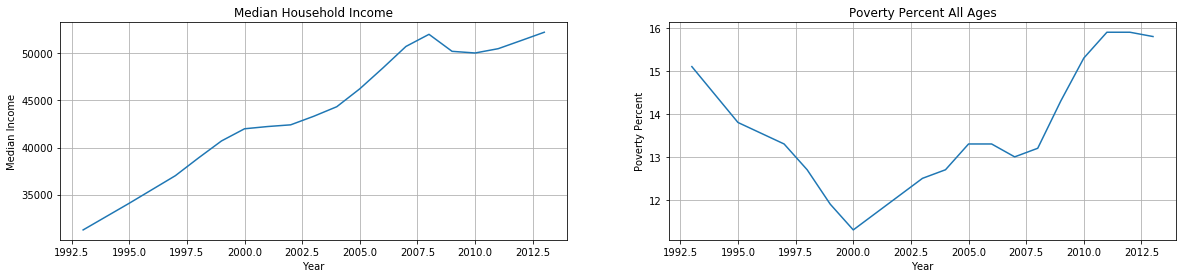

In [16]:
fig, ax = plt.subplots(1,2, figsize=(20,4))

y1 = US_stat['Median Household Income']
x1 = US_stat.index.values

ax[0].set_title('Median Household Income')
ax[0].set_ylabel('Median Income')
ax[0].set_xlabel('Year')
ax[0].grid(True)

y2 = US_stat['Poverty Percent All Ages']
ax[1].set_title('Poverty Percent All Ages')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Poverty Percent')
ax[1].grid(True)

ax[0].plot(x1, y1)
ax[1].plot(x1, y2)

plt.show()

In [17]:
numr = US_stat['Poverty Percent All Ages'].iloc[18] 
denom = US_stat['Poverty Percent All Ages'].iloc[5]
# print numr 
# print denom
print "Percentage of Increase of Poverty in US from 2000 to 2013" 
poverty_change = numr/denom
poverty_change

Percentage of Increase of Poverty in US from 2000 to 2013


1.3982300884955752

### 2000 was a good year

We see from these graphs that even though the median household in the US keeps increasing at a more or less constant rate, the poverty levels reached a minimum at 2000 and have increased dramatically , by 40% since then.

We will now attempt to identify the geographic distribution of the rise in poverty since 2000.

We start by plotting the time evolution of poverty for each of the states.

### Plotting the change in poverty percentages by state.

For each state, plot the poverty levels across time and compare it with the nation-wide poverty level.

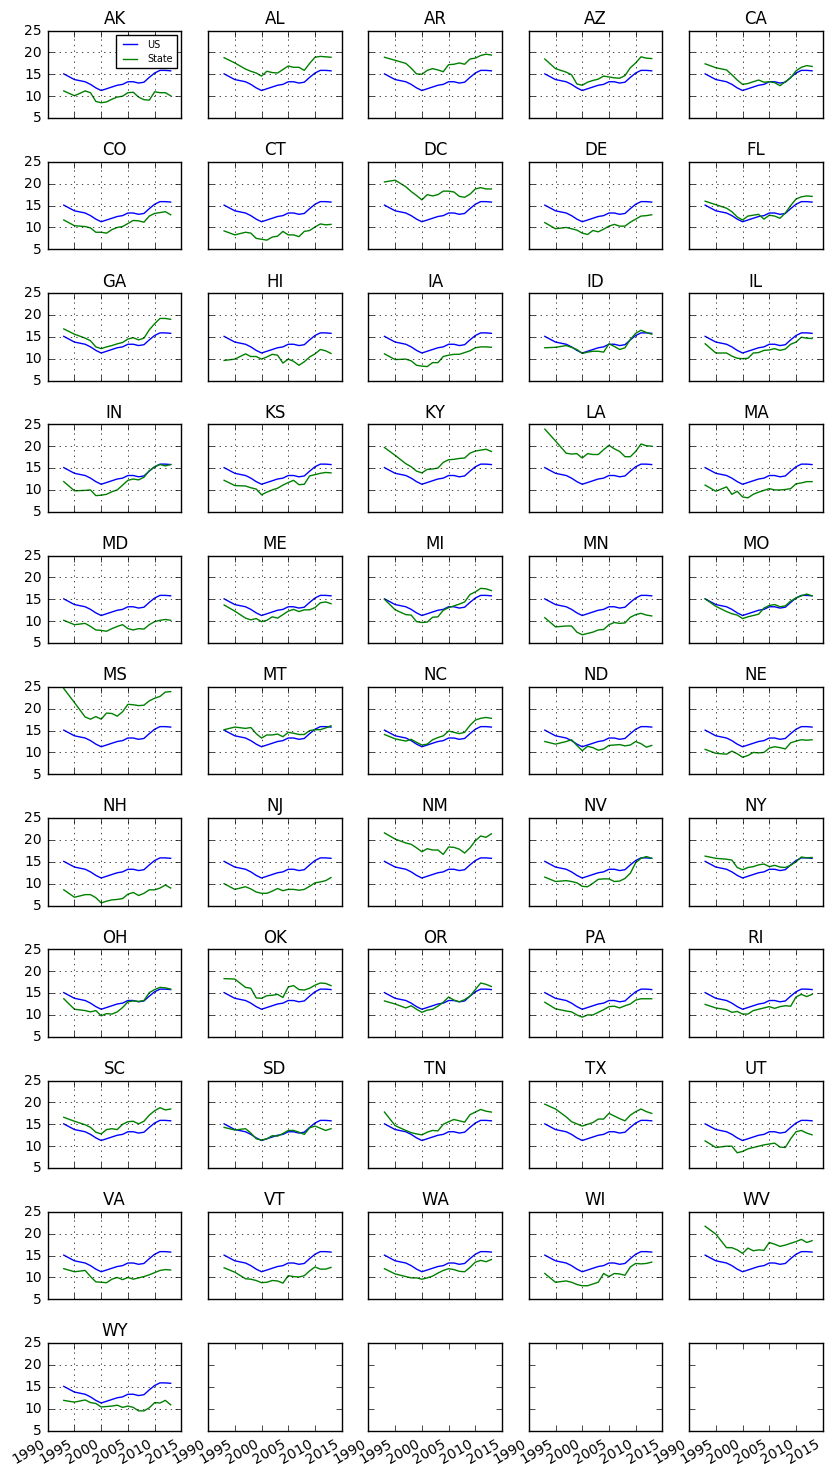

In [21]:
nrows = 11
ncols = 5

all_states = states_stat.index.get_level_values('Postal').unique().tolist()

fig, axs = plt.subplots(nrows, ncols, figsize=(10,20), sharex=True, sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace = 0.2)

axs = axs.ravel()  #Changing numpy array (which is 2 dimensional) to Series (1-dimension)

x_us = US_stat.index.values
y_us = US_stat['Poverty Percent All Ages']

i=0
for state in all_states:
    axs[i].plot(x_us, y_us, label='US')
    
    y_state = states_stat['Poverty Percent All Ages'][state]
    axs[i].plot(x_us, y_state, label='State')
    
    axs[i].set_title(state)
    axs[i].grid(True)

    i += 1
axs[0].legend(loc=0, fontsize=('x-small'))    
plt.gcf().autofmt_xdate()     #Makes year on X-axis as slanting in plot
plt.show()

In [18]:
#  REMEMBER TO CLEAR the OUTPUT  from Vincent before closing the Notebook ****
import vincent
vincent.core.initialize_notebook()
import json

In [19]:
county_vinc = county_stat[(county_stat.index.get_level_values('Year') == 2000) | (county_stat.index.get_level_values('Year') == 2013)]
county_vinc.head(5)

State FIPS County FIPS  Poverty Estimate All Ages  \
Postal FIPS  Year                                                     
AK     02013 2000         02         013                      314.0   
             2013         02         013                      470.0   
       02016 2000         02         016                      347.0   
             2013         02         016                      426.0   
       02020 2000         02         020                    17188.0   

                   Poverty Percent All Ages  Poverty Estimate Under Age 18  \
Postal FIPS  Year                                                            
AK     02013 2000                      12.6                           51.0   
             2013                      15.2                           43.0   
       02016 2000                       6.1                           55.0   
             2013                       8.1                           52.0   
       02020 2000                       6.7                         6610.0   

                   Poverty Percent Under Age 18  Poverty Estimate Ages 5-17  \
Postal FIPS  Year                                                             
AK     02013 2000                          13.5                        31.0   
             2013                          13.3                        27.0   
       02016 2000                           6.7                        35.0   
             2013                           7.6                        35.0   
       02020 2000                           8.9                      4055.0   

                   Poverty Percent Ages 5-17  Median Household Income  \
Postal FIPS  Year                                                       
AK     02013 2000                       11.0                  42703.0   
             2013                       11.6                  56856.0   
       02016 2000                        5.8                  56365.0   
             2013                        6.9                  74088.0   
       02020 2000                        7.6                  56690.0   

                                         Name      src_file  
Postal FIPS  Year                                            
AK     02013 2000      Aleutians East Borough  est00ALL.dat  
             2013      Aleutians East Borough  est13ALL.txt  
       02016 2000  Aleutians West Census Area  est00ALL.dat  
             2013  Aleutians West Census Area  est13ALL.txt  
       02020 2000           Anchorage Borough  est00ALL.dat

In [20]:
drop_cols = ['State FIPS', 'County FIPS','Poverty Estimate All Ages', 
                    'Poverty Estimate Under Age 18', 
                   'Poverty Percent Under Age 18', 'Poverty Estimate Ages 5-17', 
                   'Poverty Percent Ages 5-17', 'Median Household Income','Name', 'src_file']
for cl in drop_cols:
    county_vinc.drop(cl, inplace=True, axis=1)

county_vinc.head(5)

/Users/aluthra/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Poverty Percent All Ages
Postal FIPS  Year                          
AK     02013 2000                      12.6
             2013                      15.2
       02016 2000                       6.1
             2013                       8.1
       02020 2000                       6.7

In [21]:
# Changing Year(which is Index) to column 
county_vinc = county_vinc.unstack('Year')
county_vinc.head(5)

Poverty Percent All Ages      
Year                             2000  2013
Postal FIPS                                
AK     02013                     12.6  15.2
       02016                      6.1   8.1
       02020                      6.7   7.7
       02050                     22.2  25.1
       02060                      5.9   9.5

In [22]:
# By slicing df, getting rid of unnecessary top row "Poverty Percent..."
county_vinc = county_vinc.xs('Poverty Percent All Ages', axis=1, drop_level=True)
county_vinc.head(5)

Year          2000  2013
Postal FIPS             
AK     02013  12.6  15.2
       02016   6.1   8.1
       02020   6.7   7.7
       02050  22.2  25.1
       02060   5.9   9.5

In [23]:
# Changing Postal & FIPS (which are Index) to column 
county_vinc = county_vinc.reset_index(level=[0,1], drop=False)
county_vinc.head(5)

Year,Postal,FIPS,2000,2013
0,AK,02013,12.6,15.2
1,AK,02016,6.1,8.1
2,AK,02020,6.7,7.7
3,AK,02050,22.2,25.1
4,AK,02060,5.9,9.5


In [24]:
# Making index name as Blank (it's Year)
county_vinc.columns.name = ''

In [25]:
# Changing column name type from Integer to String for easy access in calculating change ratio
county_vinc = county_vinc.rename(columns={2000: '2000', 2013: '2013'})
county_vinc.columns

Index([u'Postal', u'FIPS', u'2000', u'2013'], dtype='object', name=u'')

In [26]:
county_vinc['Change Ratio'] = county_vinc['2013'] / county_vinc['2000']
county_vinc.head(5)

,Postal,FIPS,2000,2013,Change Ratio
0,AK,02013,12.6,15.2,1.206349
1,AK,02016,6.1,8.1,1.327869
2,AK,02020,6.7,7.7,1.149254
3,AK,02050,22.2,25.1,1.130631
4,AK,02060,5.9,9.5,1.610169


In [27]:
county_vinc['Normalized Change Ratio'] = county_vinc['Change Ratio'] / poverty_change
county_vinc.head(5)

,Postal,FIPS,2000,2013,Change Ratio,Normalized Change Ratio
0,AK,02013,12.6,15.2,1.206349,0.862769
1,AK,02016,6.1,8.1,1.327869,0.949678
2,AK,02020,6.7,7.7,1.149254,0.821935
3,AK,02050,22.2,25.1,1.130631,0.808616
4,AK,02060,5.9,9.5,1.610169,1.151577


In [28]:
county_vinc.shape

(3146, 6)

In [29]:
cnty_topo = r'us_counties.topo.json'
geo_data = [ {'name': 'counties', 
              'url': cnty_topo, 
              'feature': 'us_counties.geo'} ]

with open('us_counties.topo.json' , 'r') as fle:
    get_id = json.load(fle)
    
new_gmtry = []
for gmtry in get_id['objects']['us_counties.geo']['geometries']:
    gmtry['properties']['FIPS'] = int(gmtry['properties']['FIPS'])
    new_gmtry.append(gmtry)
    
get_id['objects']['us_counties.geo']['geometries'] = new_gmtry
gymtris = get_id['objects']['us_counties.geo']['geometries']

cnty_codes = [x['properties']['FIPS'] for x in gymtris]
cnty_df = pd.DataFrame({'FIPS': cnty_codes}, dtype=str)

In [30]:
cnty_df.shape
cnty_df.head(5)

,FIPS
0,22051
1,53073
2,30105
3,30029
4,16021


In [31]:
county_vinc.shape
county_vinc.head(5)

,Postal,FIPS,2000,2013,Change Ratio,Normalized Change Ratio
0,AK,02013,12.6,15.2,1.206349,0.862769
1,AK,02016,6.1,8.1,1.327869,0.949678
2,AK,02020,6.7,7.7,1.149254,0.821935
3,AK,02050,22.2,25.1,1.130631,0.808616
4,AK,02060,5.9,9.5,1.610169,1.151577


In [32]:
# Changing type of FIPS in county_vinc to intger so that to perform inner join
print type(county_vinc['FIPS'][7])
county_vinc['FIPS'] = county_vinc['FIPS'].astype(int)
print type(county_vinc['FIPS'][7])

<type 'str'>
<type 'numpy.int64'>


In [33]:
county_vinc.shape

(3146, 6)

In [34]:
cnty_df.shape

(3405, 1)

In [35]:
#cnty_df['FIPS'] = cnty_df['FIPS'].astype(int)
merged_df = pd.merge(county_vinc, cnty_df, on='FIPS', how='inner')
merged_df = merged_df.fillna(method='pad')
merged_df.shape

(3318, 6)

In [36]:
geo_data

[{'feature': 'us_counties.geo',
  'name': 'counties',
  'url': 'us_counties.topo.json'}]

In [ ]:
vis = vincent.Map(data=merged_df, geo_data=geo_data, scale=1300, projection='albersUsa',
                 data_bind='2000', data_key='FIPS', map_key={'counties': 'properties.FIPS'})
vis.scales['color'].type = 'threshold'
vis.scales['color'].domain = [0, 4, 6, 8, 10, 12, 20, 30]
vis.legend(title='Poverty 2000 Percentage')
#       ***Uncomment the following line to Create Vincent map*********
vis
#       ***Important clear cell output Vincent map before closing the Jupyter Notebook*********

In [ ]:
vis = vincent.Map(data=merged_df, geo_data=geo_data, scale=1100, projection='albersUsa',
                 data_bind='2013', data_key='FIPS', map_key={'counties': 'properties.FIPS'})
vis.scales['color'].type = 'threshold'
vis.scales['color'].domain = [0, 4, 6, 8, 10, 12, 20, 30]
vis.legend(title='Poverty 2013 Percentage')
#       ***Uncomment the following line to Create Vincent map*********
vis
#       ***Important clear cell output Vincent map before closing the Jupyter Notebook*********

In [ ]:
vis = vincent.Map(data=merged_df, geo_data=geo_data, scale=1100, projection='albersUsa',
                 data_bind='Normalized Change Ratio', data_key='FIPS', map_key={'counties': 'properties.FIPS'})
vis.scales['color'].type = 'threshold'
vis.scales['color'].domain = [0, 0.8, 0.9, 1.0, 1.2, 1.3]
vis.legend(title='Change in Poverty Percentage')
#       ***Uncomment the following line to Create Vincent map*********
vis

#       ***Important clear cell output Vincent map before closing the Jupyter Notebook*********

### Plotting poverty statistics by county

Using the vincent library and the dataframe `county_stat`, generating the following three maps.

1. Overall percentage of poverty for each county in 2000.
![poverty2000](Poverty2000.jpg)
1. Overall percentage of poverty for each county in 2013.
![poverty2013](Poverty2013.jpg)
1. Ratio between percentage of change in poverty from 2000 to 2013 for each county. Divided by the nation-wide change in poverty (1.39).
![povertyChange](PovertyChange.jpg)

### Identify the extremes cases of change in Poverty.
Find counties in which the poverty percentage increased or decreased the most during the period 2000 - 2013.

In [40]:
merged_df.sort_values(by = ['Normalized Change Ratio'], ascending=False).head(4)

,Postal,FIPS,2000,2013,Change Ratio,Normalized Change Ratio
741,IA,19169,8.2,21.1,2.573171,1.840306
554,GA,13135,5.6,13.7,2.446429,1.749661
1485,MN,27037,3.5,8.4,2.400000,1.716456
1426,MI,26099,5.6,13.4,2.392857,1.711347


In [41]:
max_row = merged_df.sort_values(by = ['Normalized Change Ratio'], ascending=False).iloc[0].tolist()
print max_row
min_row = merged_df.sort_values(by = ['Normalized Change Ratio']).iloc[0].tolist()
print min_row

['IA', 19169, 8.1999999999999993, 21.100000000000001, 2.5731707317073176, 1.8403056498919423]
['ND', 38007, 13.800000000000001, 8.1999999999999993, 0.5942028985507245, 0.4249678957989359]


In [42]:
print "County FIPS with max increase in poverty is {} in state {} with Normalized change ratio {} %" \
.format(max_row[1], max_row[0], round(max_row[5],2))

County FIPS with max increase in poverty is 19169 in state IA with Normalized change ratio 1.84 %


In [43]:
print "County FIPS with max decrease in poverty is {} in state {} with Normalized change ratio {} %" \
.format(min_row[1], min_row[0], round(min_row[5],2))

County FIPS with max decrease in poverty is 38007 in state ND with Normalized change ratio 0.42 %
